![Nama](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQt4BktiBjIAO9bUOiQmdqRSceQhdRTuy5ESw&usqp=CAU)

# Netflix Movies and TV Shows Analysis

This dataset provides comprehensive information about the vast array of movies and TV shows accessible on Netflix, a leading media and video streaming service. As of mid-2021, Netflix boasts a staggering collection of over 8,000 titles and a global subscriber base exceeding 200 million. It includes details like cast, directors, ratings, release year, duration, and more for each entry.

__Columns:__
- Show Id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie / Tv show
- Country: Country where the movie / Tv show was produced
- Data_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie / Tv show
- Rating: TV Rating of the movie / Tv show
- Duration: Total Duration - in minutes or number of seasons

**Source** : https://www.kaggle.com/datasets/shivamb/netflix-shows

## A) Importing Library and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## B) Data Processing

In [5]:
df.shape

(8807, 12)

### -> Missing Values

In [6]:
for column in df.columns:
    null_rate = df[column].isna().sum() / len(df) * 100
    null_count = df[column].isna().sum()
    if null_rate > 0:
        print("{} null rate: {:.2f}% ({} data)".format(column, null_rate, null_count))

director null rate: 29.91% (2634 data)
cast null rate: 9.37% (825 data)
country null rate: 9.44% (831 data)
date_added null rate: 0.11% (10 data)
rating null rate: 0.05% (4 data)
duration null rate: 0.03% (3 data)


In [7]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['director'].fillna('Unknown', inplace=True)

df['cast'].fillna('Unknown', inplace = True)

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

In [8]:
df.shape

(8790, 12)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### ->Customize The Data Type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [11]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month

df['month_name_added'] = df['date_added'].dt.month_name()

df['year_added'] = df['date_added'].dt.year

In [12]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [13]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

df['country'] = df['first_country']

df.drop(columns=['first_country'], inplace=True)

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


## C) Exploratory Data Analysis

### Q1. What is The Most Dominant Type of Content on The Netflix Platform (Movies or TV shows)? 

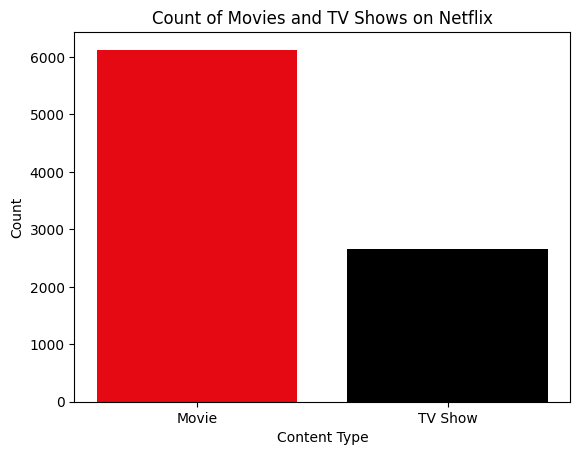

In [15]:
netflix_colors = ['#E50914', '#000000'] 

content_counts = df['type'].value_counts()

plt.bar(content_counts.index, content_counts.values, color=netflix_colors)

plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows on Netflix')

plt.show()

### Q2. Is There a Category of Content That The Audience Prefers?

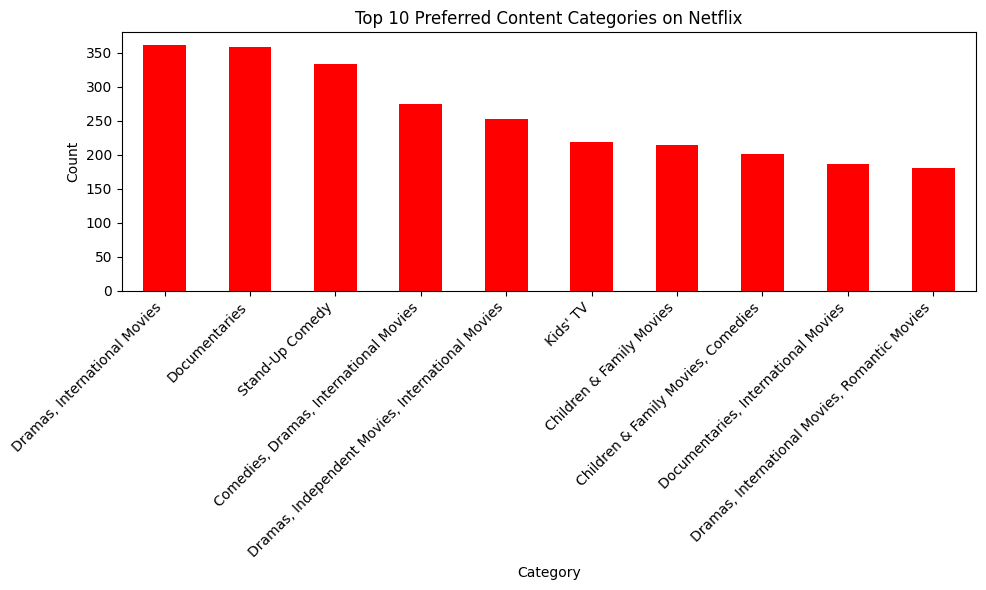

In [16]:
category_counts = df['listed_in'].value_counts().head(10) 

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='Red')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Preferred Content Categories on Netflix')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

### Q3. Which Directors are Most Often Involved in The Production of Netflix Content?

In [17]:
director_counts = df['director'].value_counts().head(10) 

print(director_counts)

Unknown                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: director, dtype: int64


### Q4. How does the amount of content added compare between years? Is there a significant increase or decrease from one year to the next?

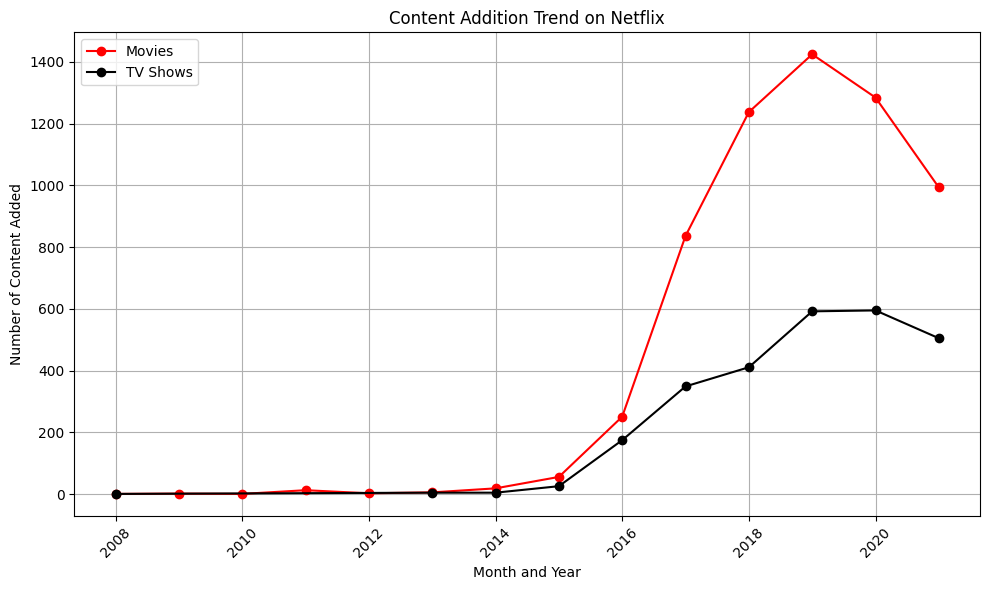

In [18]:
plt.figure(figsize=(10, 6))

movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

movies_df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='red', label='Movies')

tv_shows_df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='black', label='TV Shows')

plt.title('Content Addition Trend on Netflix')
plt.xlabel('Month and Year')
plt.ylabel('Number of Content Added')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()  
plt.show()

### Q5. Which months have the highest number of content uploads?

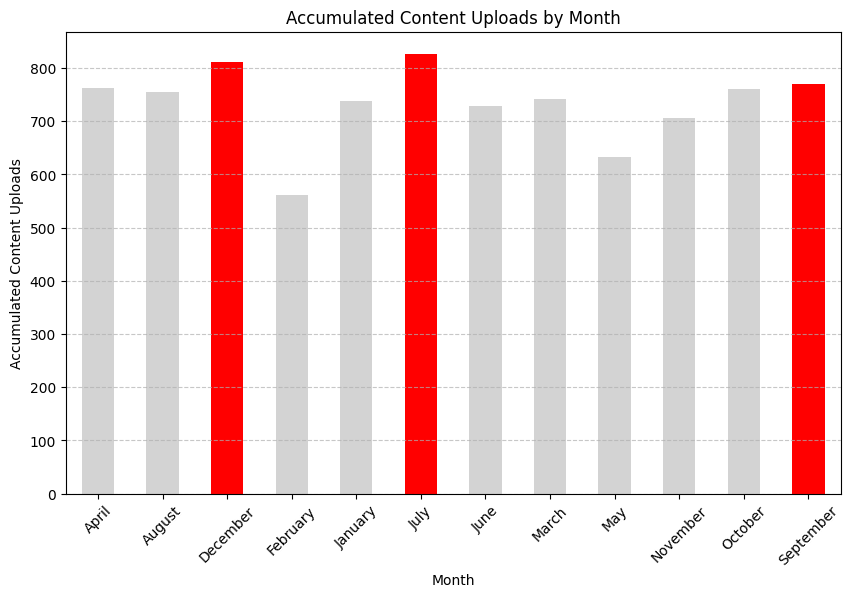

In [19]:
monthly_counts = df.groupby(['year_added', 'month_name_added']).size().reset_index(name='count')

accumulated_counts = monthly_counts.groupby('month_name_added')['count'].sum()

top_3_months = accumulated_counts.nlargest(3).index

plt.figure(figsize=(10, 6))
accumulated_counts.plot(kind='bar', color=['red' if month in top_3_months else 'lightgrey' for month in accumulated_counts.index])
plt.title('Accumulated Content Uploads by Month')
plt.xlabel('Month')
plt.ylabel('Accumulated Content Uploads')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()